# Proyek Analisis Data: E-commerce-public-dataset
- **Nama:** Farrel Arsya Winarendra
- **Email:** farrelaw05@gmail.com
- **ID Dicoding:** MC005D5Y1297

## Menentukan Pertanyaan Bisnis

1.  **Dampak kondisi cuaca pada jumlah penyewaan sepeda**

2.  **Bagaimana tren musiman mempengaruhi penyewaan sepeda**

## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

dataset = '/content/drive/My Drive/Bike-sharing-dataset/day.csv'
# dataset2 = '/content/drive/My Drive/Bike-sharing-dataset/hour.csv'

df = pd.read_csv(dataset)
# data2 = pd.read_csv(dataset2)

# # combined_data = pd.merge(data1, data2, on='dteday', how='inner')
# combined_data = pd.concat([data1, data2], ignore_index=True)
# df = combined_data

Mounted at /content/drive


**Insight:**
- Dataset diupload terlebih dahulu ke Google Drive dan masukan package library dari google colab untuk mengambil dataset

- Dataset yang akan di analisis berisi jumlah pengguna sepeda rental yang diagregasi setiap hari

### Assessing Data

In [4]:
df.shape

(731, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [7]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

**Insight:**
- Dataset gabungan memiliki 731 baris dan 16 kolom, termasuk fitur-fitur seperti tanggal, musim, cuaca, jumlah pengguna, dll

- Kolom dengan berbagai data type (float, integer, object)

### Cleaning Data

In [8]:
df.dropna(inplace=True)
null = df.isnull().sum()
print(null)

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [9]:
df.drop_duplicates()
df.duplicated().sum()

0

**Insight:**
- Dataset tidak memiliki data yang NULL, tetapi dropna() digunakan untuk memastikan data tersebut bersih

- Dataset tidak memiliki baris yang duplikat

## Exploratory Data Analysis (EDA)

### Explore ...

In [10]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


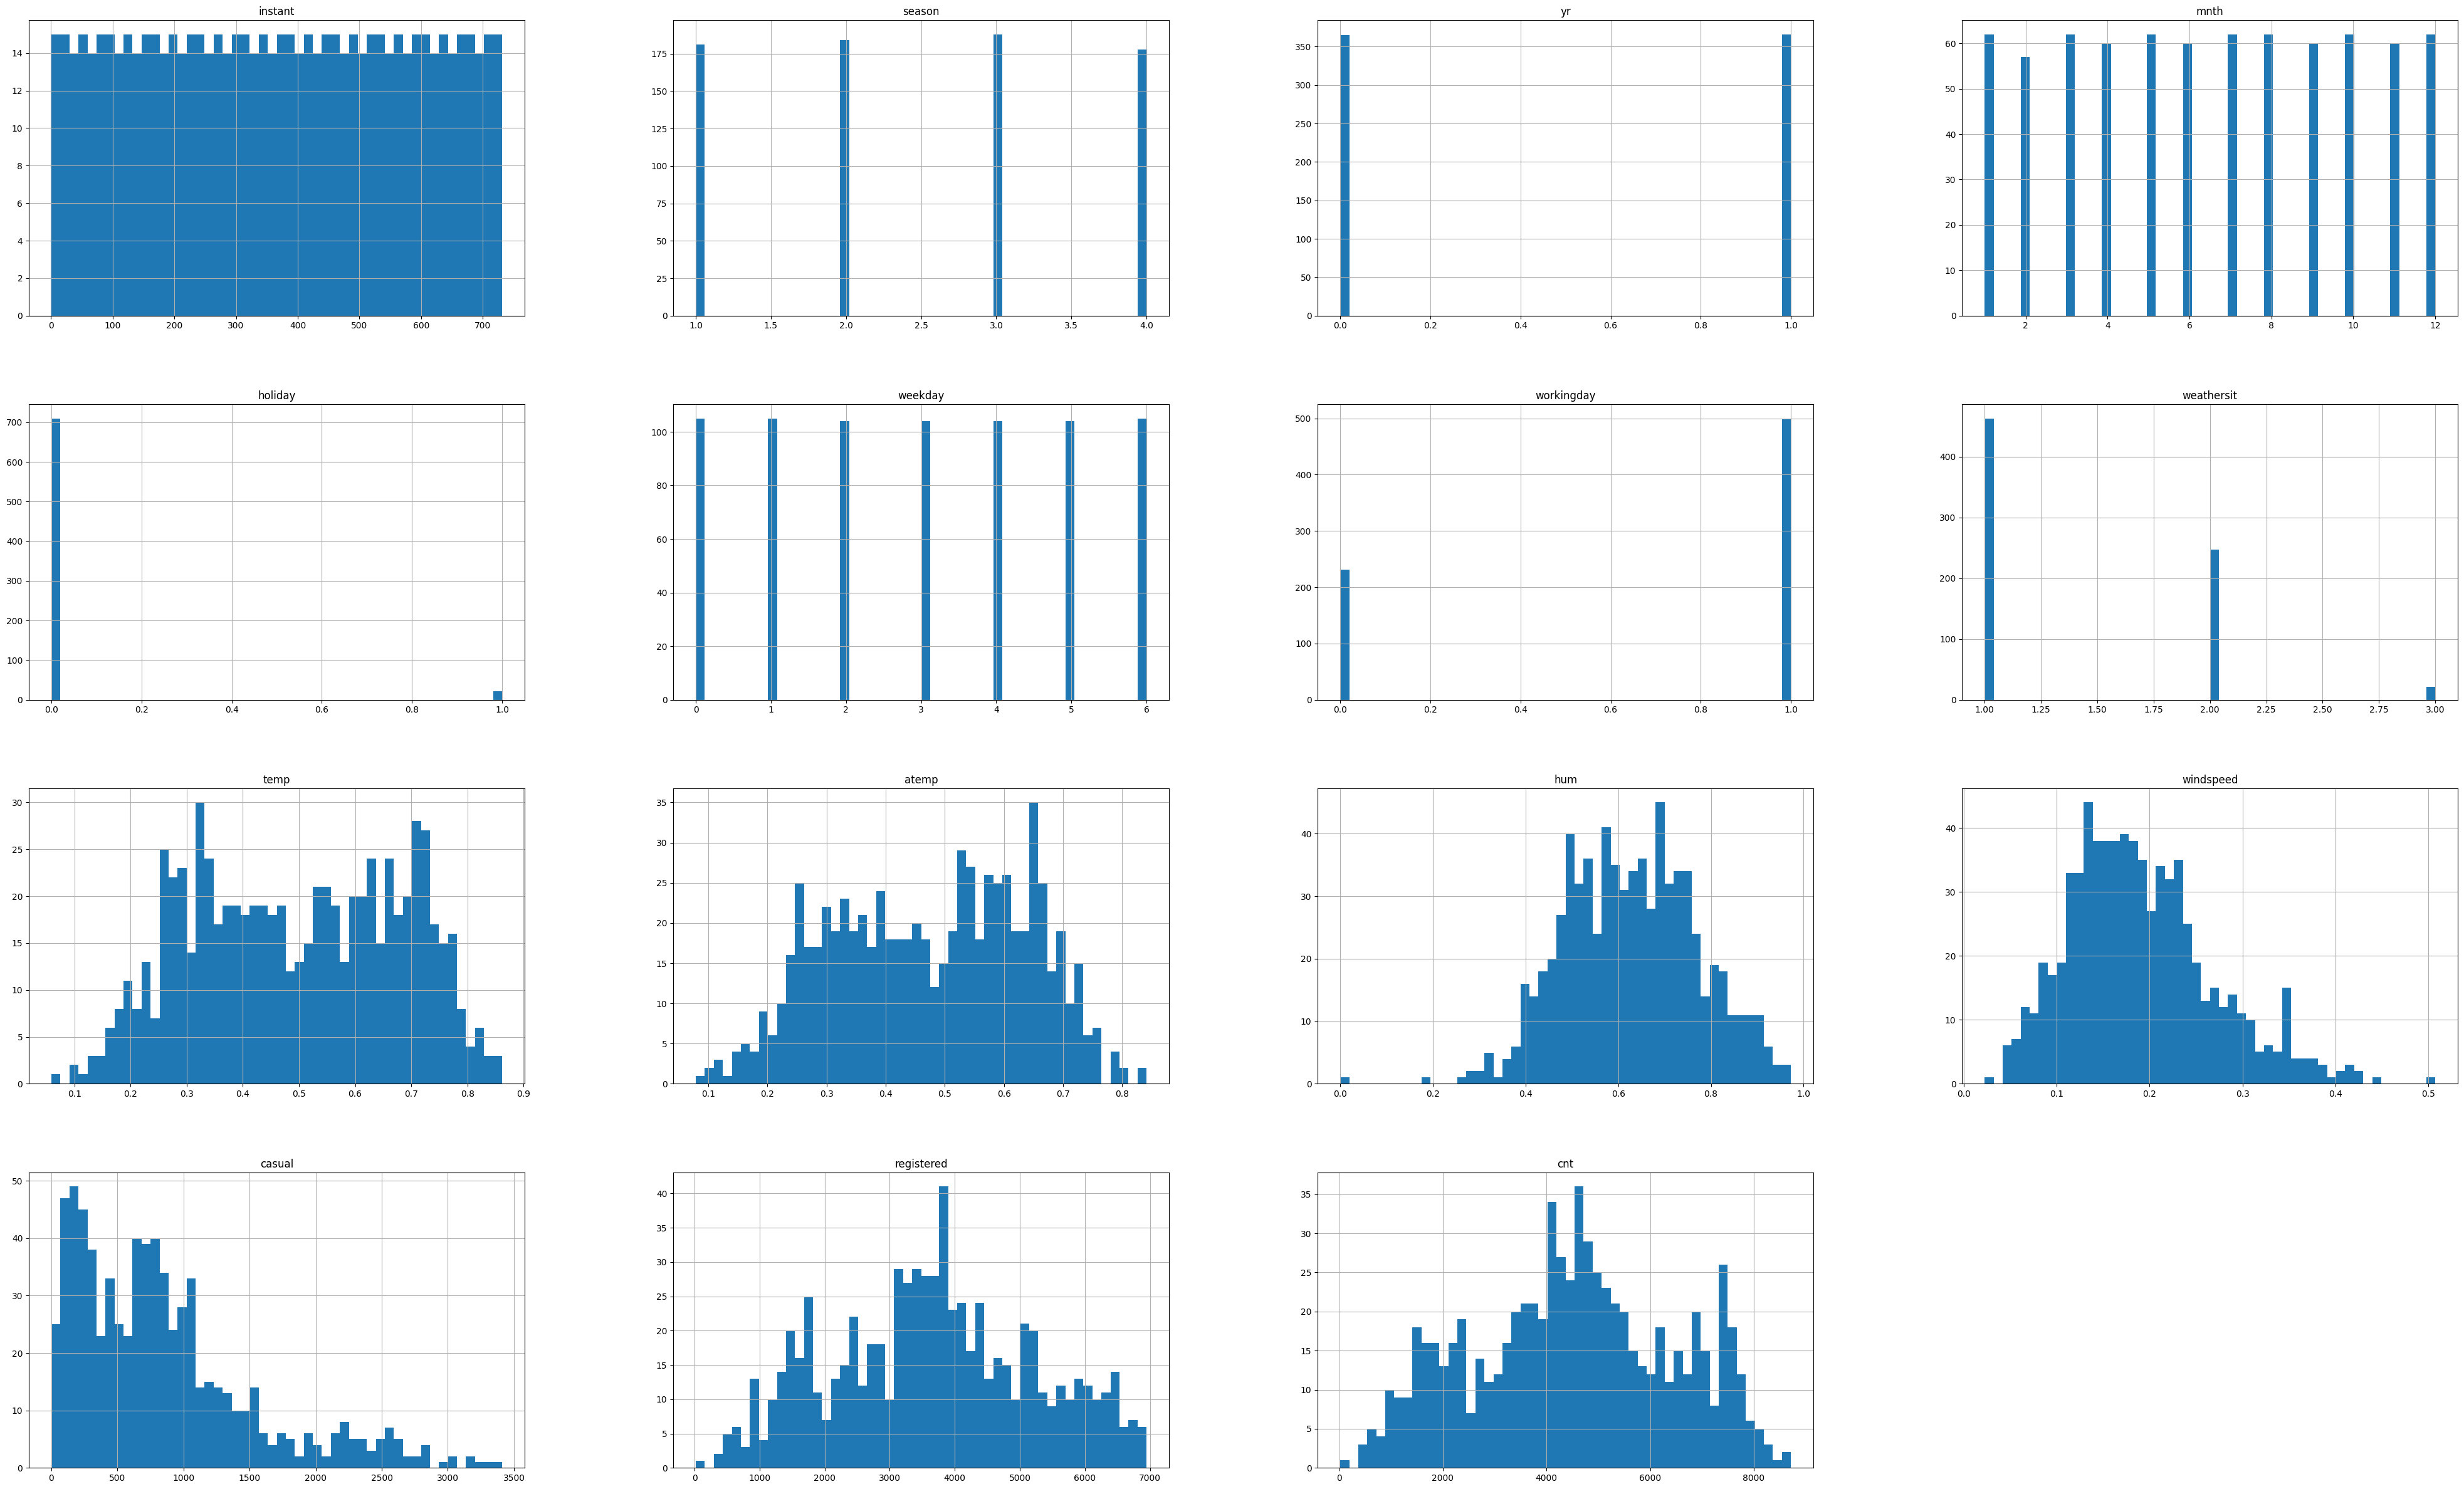

In [11]:
df.hist(figsize=(50, 30), bins=50)
plt.show()

Text(0.5, 1.0, 'Segmentasi Pengguna')

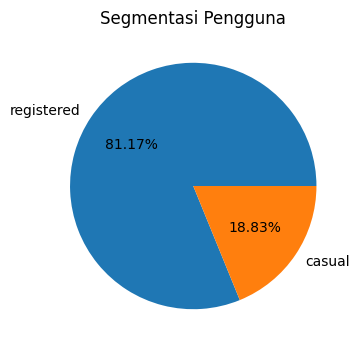

In [12]:
plt.figure(figsize=(10, 4))
df[['registered', 'casual']].sum().plot(kind='pie', autopct='%1.2f%%')
plt.title('Segmentasi Pengguna')

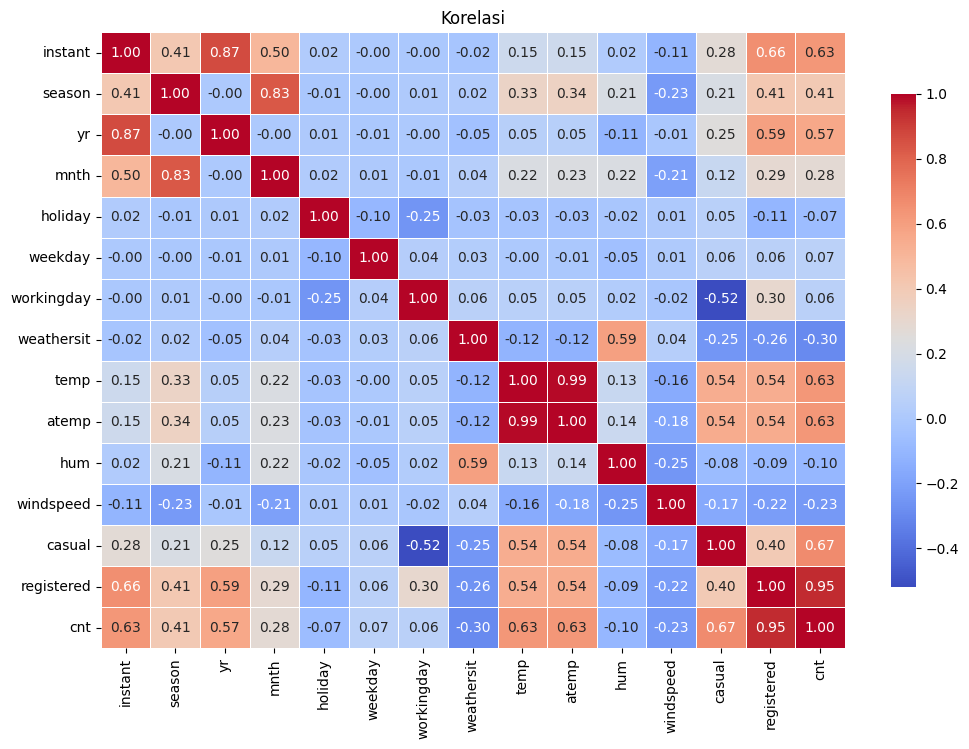

In [14]:
df = df.drop(columns=['dteday'])
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, annot_kws={"size": 10},cbar_kws={'shrink': 0.8})
plt.title('Korelasi')
plt.show()

**Insight:**
- describe() menunjukkan statistik data di semua kategori, berbagai contoh seperti rata-rata 4.504 total penyewaan sepeda per hari, sebagian besar adalah hari kerja (68,4%) dengan cuaca yang baik (rata-rata 1,4), suhu rata-rata sekitar 0,49 (normal)

- Korelasi matrix menunjukan kolom yang memiliki korelasi paling tinggi 1 >= dan korelasi paling rendah 0 <=. Serta lebih banyak user yang sudah registrasi sekitar 81% daripada user yang kasual sekitar 19%

## Visualization & Explanatory Analysis

### Pertanyaan 1:

In [15]:
weather = df.groupby('weathersit')['cnt'].agg(['mean', 'sum']).reset_index()
weather.columns = ['Kondisi Cuaca', 'Rata-rata Rental', 'Total Rental']
print(weather)

   Kondisi Cuaca  Rata-rata Rental  Total Rental
0              1       4876.786177       2257952
1              2       4035.862348        996858
2              3       1803.285714         37869


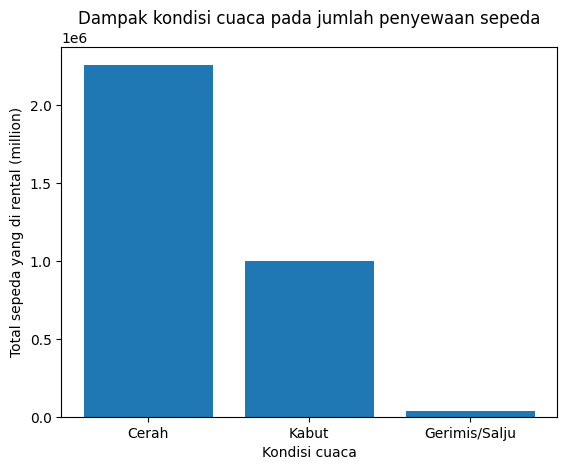

In [18]:
plt.bar(weather['Kondisi Cuaca'], weather['Total Rental'])
plt.title('Dampak kondisi cuaca pada jumlah penyewaan sepeda')
plt.xlabel('Kondisi cuaca')
plt.ylabel('Total sepeda yang di rental (million)')
plt.xticks(weather['Kondisi Cuaca'], labels=['Cerah', 'Kabut', 'Gerimis/Salju',])
plt.show()

### Pertanyaan 2:

In [17]:
seasonal = df.groupby('season')['cnt'].agg(['mean', 'sum']).reset_index()
seasonal.columns = ['Musim', 'Rata-rata Rental', 'Total Rental']
print(seasonal)

   Musim  Rata-rata Rental  Total Rental
0      1       2604.132597        471348
1      2       4992.331522        918589
2      3       5644.303191       1061129
3      4       4728.162921        841613


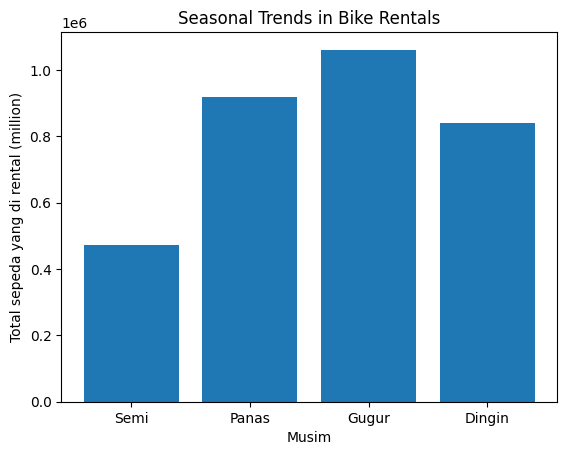

In [19]:
plt.bar(seasonal['Musim'], seasonal['Total Rental'])
plt.title('Seasonal Trends in Bike Rentals')
plt.xlabel('Musim')
plt.ylabel('Total sepeda yang di rental (million)')
plt.xticks(seasonal['Musim'], labels=['Semi', 'Panas', 'Gugur', 'Dingin'])
plt.show()

**Insight:**
- Terdapat tiga kondisi cuaca yang terdata. Cuaca cerah menunjukan  rata-rata tertinggi sekitar 4.876 rental per hari dan total rental keseluruhan 2.257.952 rental

- Empat musim utama. Musim gugur memiliki total rental tertinggi berjumlah 1.061.129 dengan rata-rata rental sekitar 2.604

## Conclusion

- Cuaca secara signifikan mempengaruhi penyewaan sepeda, dengan cuaca cerah yang menyebabkan jumlah penyewaan tertinggi, kondisi berkabut mengurangi sedikit penyewaan, dan hujan ringan atau salju menyebabkan penurunan yang tajam

- Puncak penyewaan sepeda terjadi pada musim gugur dengan demand tertinggi, diikuti oleh musim panas, musim dingin, dan musim semi yang memiliki permintaan terendah